In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#dep info later
%matplotlib inline

In [2]:
df = pd.read_csv("cleandata.csv")
columns = list(df)
df['Position'] = pd.Categorical(df['Position'],
                                    categories=['Professor', 'Associate Professor', 'Assistant Professor', 'Lecturer',
                                                'Lab Lecturer'],
                                    ordered=True)
df["age_by_5"] = ((df["age"] -1)// 4) * 4+1
df["C"] = pd.to_numeric(df["C"], errors="coerce")
df["P"] = pd.to_numeric(df["P"], errors="coerce")
df["H"] = pd.to_numeric(df["H"], errors="coerce")
df["P5"] = pd.to_numeric(df["P5"], errors="coerce")
df["C5"] = pd.to_numeric(df["C5"], errors="coerce")
df["H5"] = pd.to_numeric(df["H5"], errors="coerce")
df["avgC"] = pd.to_numeric(df["avgC"], errors="coerce")
df["P5avg"] = df["P5"] /6
df["C5avg"] = df["C5"] /6
df["H5avg"] = df["H5"] /6

list_of_positions = ['Professor', 'Associate Professor', 'Assistant Professor', 'Lecturer', 'Lab Lecturer']
list_of_dept = df["Dept"].value_counts().index
df[["P","C","H","P5","C5","H5"]] = df[["P","C","H","P5","C5","H5"]].fillna(0)
df["Cavg"]=df["C"]/df["age"]




<h1> SUSTADOPOIHSH </h1>

<H3>K means timeseries</H3>

In [5]:
def meleti_timseries(c_or_p):
    # gia meleti ana xrono
    if c_or_p=="P":
        start = "2021.1"
    else:
        start = "2021.2"
    filt = (df["age"]>30)

    dfc = df[filt].loc[:,start:"1981.2":2]
# 

    for column in dfc:
        dfc[column] = pd.to_numeric(dfc[column], errors="coerce")
    
    np_arrayc = dfc.to_numpy()

    return np_arrayc


cit_array= meleti_timseries("C")


<h3> data prepross </h3>

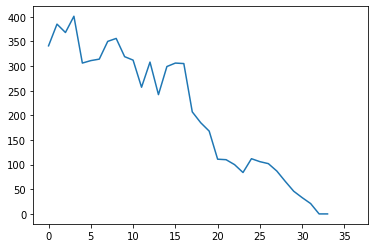

In [6]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance,TimeSeriesScalerMinMax, \
    TimeSeriesResampler

seed=0






asf= np.zeros((len(cit_array),3))


age_clust=pd.DataFrame(asf,columns=["age","cluster","C"])
filt = (df["age"]>30)
temp_age = df[filt]["age"].to_list()
temp_C = df[filt]["Cavg"].to_list()
age_clust["Cavg"] = temp_C
age_clust["age"] = temp_age


plt.plot(cit_array[130])
plt.show()







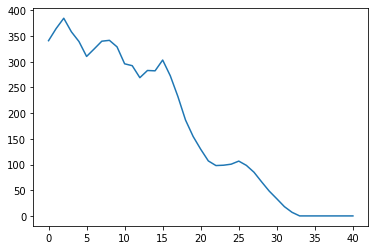

In [7]:
def data_compl(array):
#     age['age'] = age['age'].astype(int)
    maximum = np.nanmean(array,axis= 0)
    print(np.nanmean(array,axis= 0)[31:])
    print(np.nanmedian(array,axis= 0)[31:])
    for i in range(len(array)):

        array[i,(age_clust["age"][i]):]= -maximum[40:(age_clust["age"][i]-1):-1]
    return(array)    
    
                
        
    
# cit_array = data_compl(cit_array)        
# print(cit_array)


cit_array= np.nan_to_num(cit_array, copy=True, nan=0, posinf=None, neginf=None)
cit_array_copy= cit_array.copy() 
for i in range(len(cit_array)):
    for j in range(1,len(cit_array[i])-1):
         cit_array[i][j]= (cit_array_copy[i][j-1] + cit_array_copy[i][j] + cit_array_copy[i][j+1])/3




X_train = TimeSeriesScalerMinMax().fit_transform(cit_array)
# X_train=cit_array
plt.plot(cit_array[130])
plt.show()


<h3> euklidean </h3>

In [8]:
sz = X_train.shape[1]

# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=8,
                              n_init = 100,


                              max_iter_barycenter=100,
                              random_state=seed)



y_pred = dba_km.fit_predict(X_train)

age_clust["cluster"]= y_pred


# dist = numpy.linalg.norm(a-b)



DBA k-means


In [9]:
age_clust.groupby('cluster').describe()

age                                                        C       \
        count       mean       std   min   25%   50%   75%   max count mean   
cluster                                                                       
0        41.0  35.243902  2.754818  31.0  33.0  35.0  38.0  40.0  41.0  0.0   
1        19.0  34.578947  3.371709  31.0  32.0  33.0  38.0  40.0  19.0  0.0   
2         8.0  33.875000  2.587746  31.0  32.5  33.5  35.0  39.0   8.0  0.0   
3        31.0  33.806452  2.676059  31.0  32.0  33.0  35.0  40.0  31.0  0.0   
4        35.0  35.428571  2.789536  31.0  33.0  35.0  38.0  40.0  35.0  0.0   
5        19.0  33.684211  2.646856  31.0  31.0  33.0  36.0  39.0  19.0  0.0   
6        17.0  35.117647  3.199265  31.0  32.0  35.0  38.0  40.0  17.0  0.0   
7        31.0  35.129032  2.985989  31.0  32.0  35.0  38.0  40.0  31.0  0.0   

         ...            Cavg                                                \
         ...  75%  max count        mean         std        min        25%   
cluster  ...                                                                 
0        ...  0.0  0.0  41.0   92.897976  102.242325   4.486486  25.948718   
1        ...  0.0  0.0  19.0  112.018218   84.828765   7.363636  51.788816   
2        ...  0.0  0.0   8.0   23.140247   22.826292   1.823529   3.573963   
3        ...  0.0  0.0  31.0   56.592661   52.725342   0.925000  15.213206   
4        ...  0.0  0.0  35.0   75.921247   64.257868   2.342105  25.272569   
5        ...  0.0  0.0  19.0   41.974870   40.282375   4.193548  11.606537   
6        ...  0.0  0.0  17.0   56.610093   84.213093   3.052632   8.322581   
7        ...  0.0  0.0  31.0  190.295029  187.221943  22.297297  77.394595   

                                             
                50%         75%         max  
cluster                                      
0         54.000000  124.114286  507.096774  
1         91.000000  159.831696  308.062500  
2         16.563050   36.054579   63.969697  
3         41.250000   84.159539  193.062500  
4         54.029412  107.852774  254.593750  
5         37.636364   64.277778  162.361111  
6         26.580645   50.696970  333.264706  
7        138.948718  206.288462  905.894737  

[8 rows x 24 columns]

1


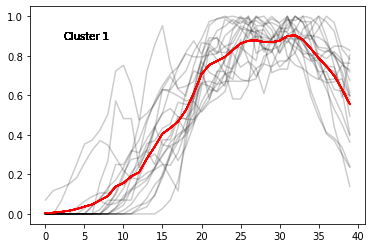

2


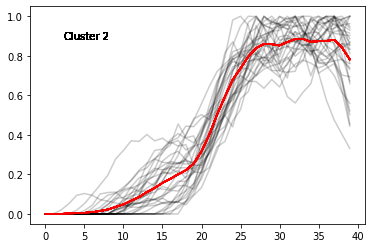

3


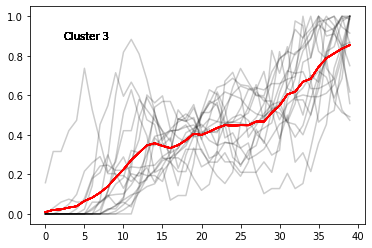

4


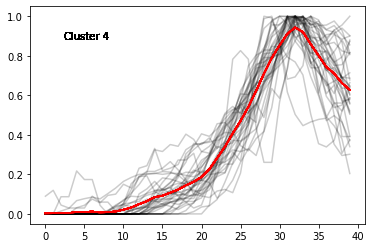

5


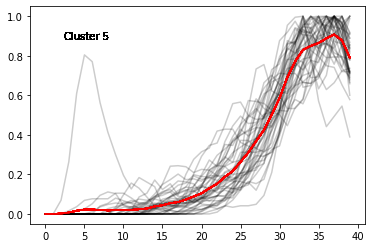

6


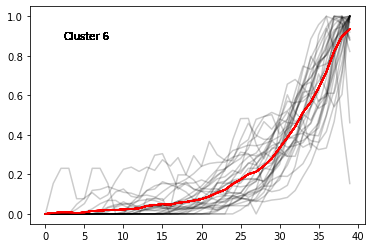

7


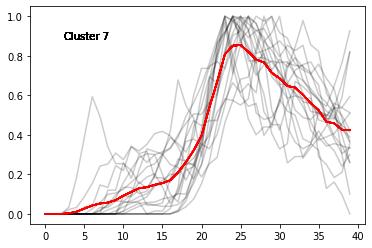

8


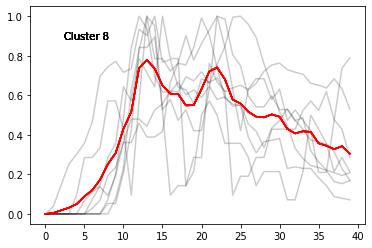

In [10]:
# print(X_train)
counter = 1
for yi in [1,7,6,4,0,3,5,2]:

    
    for xx in X_train[y_pred == yi]:
        plt.plot(xx[39::-1].ravel(), "k-", alpha=.2)
        plt.plot(dba_km.cluster_centers_[yi][39::-1].ravel(), "r-")

        plt.text(0.1, 0.85,f'Cluster %d' % (counter),
                 transform=plt.gca().transAxes)

      
    print(counter)
    plt.savefig(f"asdfasdf{counter}.png")   
    counter +=1 
    plt.show()